In [1]:

#import the necessary packages
from tensorflow.keras.applications import VGG16
import tensorflow as tf

In [2]:
model = VGG16(weights="imagenet")


553476096/553467096 [==============================] - 7s 0us/step


In [3]:
#print the layers of the pretrained model
for layer in model.layers:
    print(layer, layer.trainable)


<keras.engine.input_layer.InputLayer object at 0x7f4b504ccd90> True
<keras.layers.convolutional.Conv2D object at 0x7f4bc8052710> True
<keras.layers.convolutional.Conv2D object at 0x7f4b4de7e750> True
<keras.layers.pooling.MaxPooling2D object at 0x7f4b4dd9ced0> True
<keras.layers.convolutional.Conv2D object at 0x7f4b4a673410> True
<keras.layers.convolutional.Conv2D object at 0x7f4b4a677d50> True
<keras.layers.pooling.MaxPooling2D object at 0x7f4b4a6821d0> True
<keras.layers.convolutional.Conv2D object at 0x7f4b4a67ce10> True
<keras.layers.convolutional.Conv2D object at 0x7f4b4a686850> True
<keras.layers.convolutional.Conv2D object at 0x7f4b4a68f310> True
<keras.layers.pooling.MaxPooling2D object at 0x7f4b4a693950> True
<keras.layers.convolutional.Conv2D object at 0x7f4b4a68bf90> True
<keras.layers.convolutional.Conv2D object at 0x7f4b4a68b690> True
<keras.layers.convolutional.Conv2D object at 0x7f4b4a625610> True
<keras.layers.pooling.MaxPooling2D object at 0x7f4b4a61b7d0> True
<keras.l

In [4]:
#visualise the model layers of the pretrained model
#create a list of layers to be visualised
layer_names = [layer.name for layer in model.layers]

In [5]:
#create a tensorflow session
session = tf.keras.backend.get_session()

for layer_name in layer_names:
    print("{}: {}".format(layer_name, session.run(model.get_layer(layer_name).output)))


AttributeError: ignored

In [6]:
with tf.Graph().as_default():
    #placeholder for the model input
    image_input = tf.keras.Input(shape=(224, 224, 3))
    #get the output of the model
    output_model = model(image_input)
    #create a session
    sess = tf.Session()
    #create a summary writer
    writer = tf.summary.FileWriter("./logs")
    #get the output of the model
    writer.add_graph(sess.graph)
    #create a tensorboard summary for the model
    tf.summary.image("Image", image_input, max_outputs=5)
    #create a summary operation for the model
    summary_op = tf.summary.merge_all()
    #initialise the summary writer
    writer.add_graph(sess.graph)
    #initialise the session
    sess.run(tf.global_variables_initializer())
    #get the summary of the model
    summary = sess.run(summary_op)
    #add the summary to the summary writer
    writer.add_summary(summary)
    #close the summary writer
    writer.close()
    #close the session
    sess.close()

RuntimeError: ignored

In [9]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=False, to_file='model.png', layer_names=layer_names)

TypeError: ignored

In [10]:
model_graph = tf.keras.utils.model_to_dot(model, show_shapes=True)


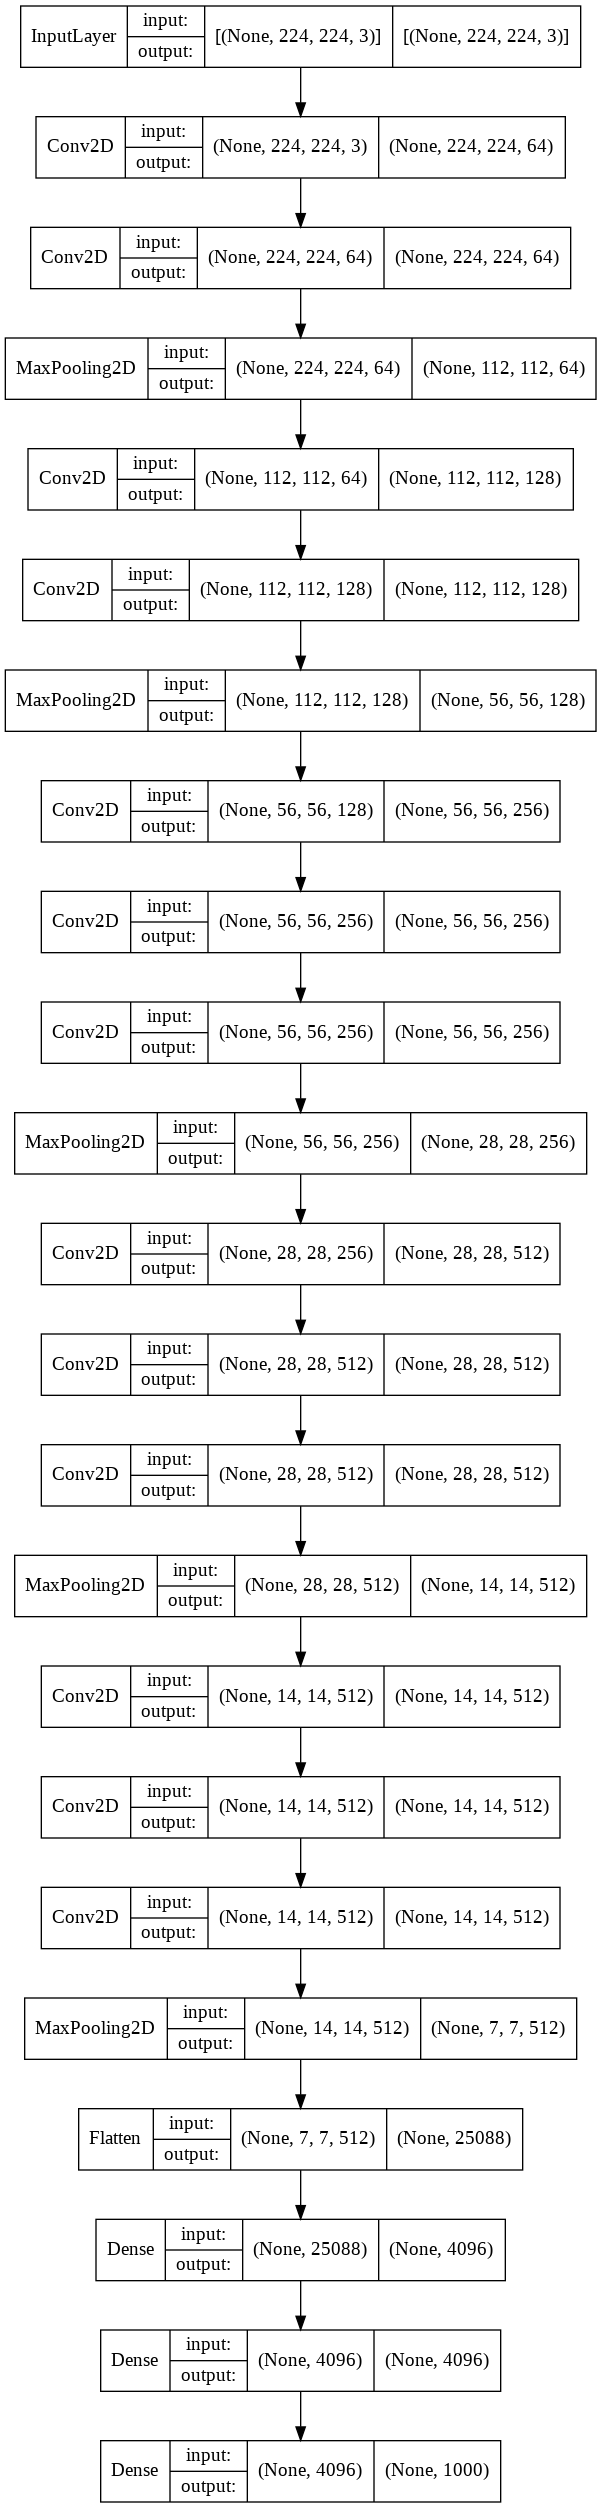

In [11]:
tf.keras.utils.plot_model(model, to_file="vgg16_model_layers.png", show_shapes=True, show_layer_names=False)


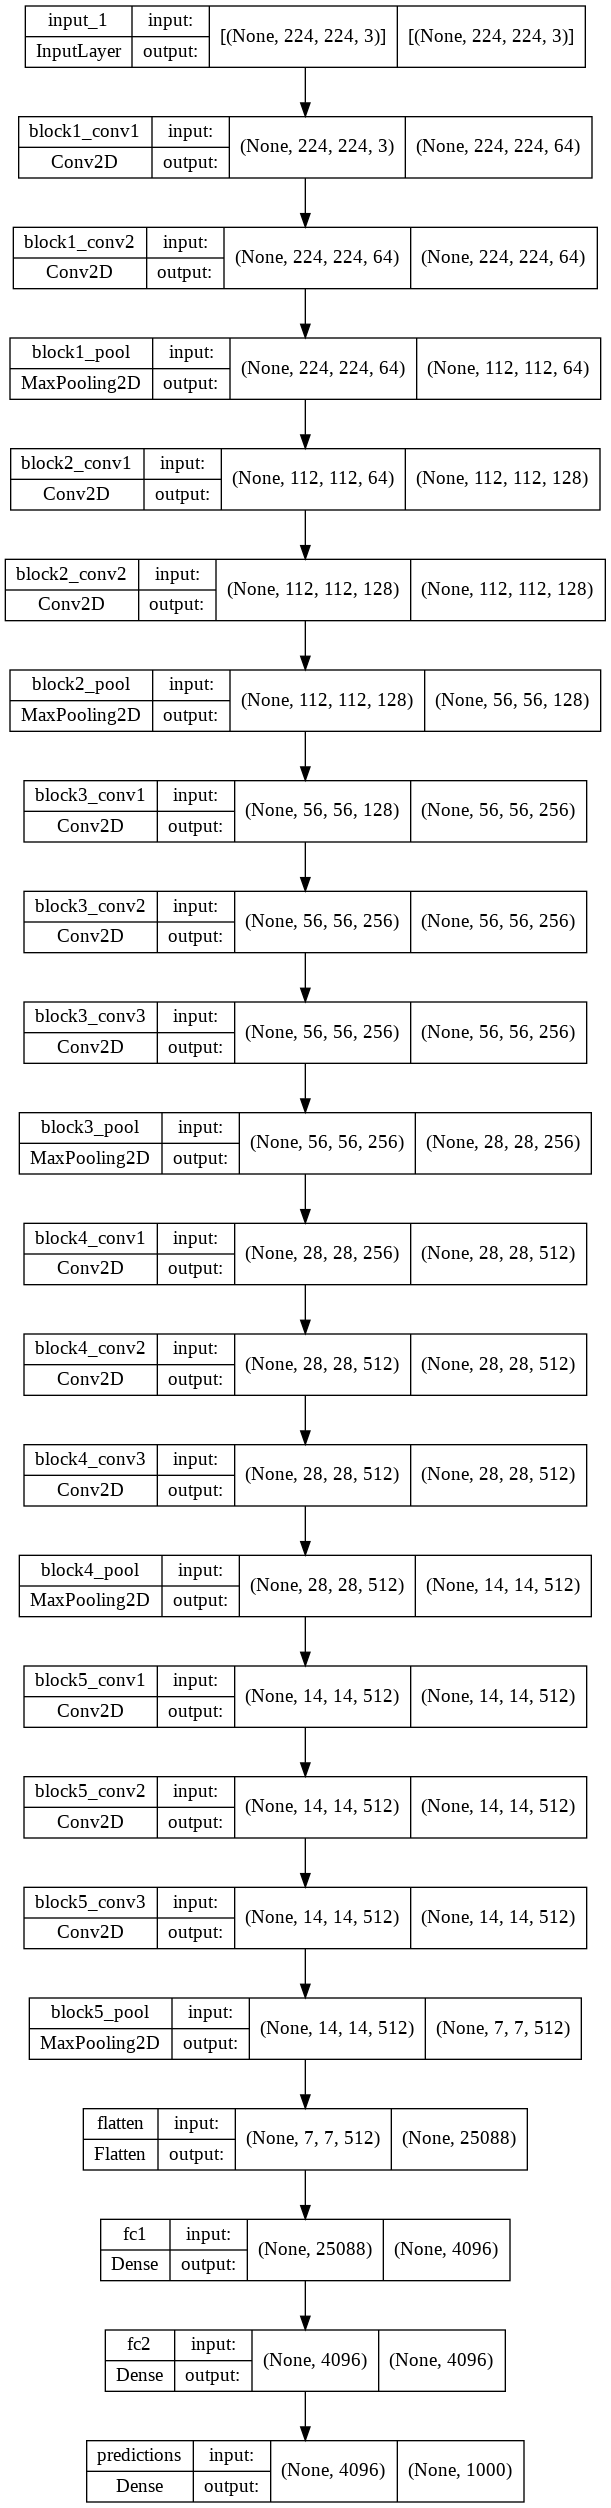

In [12]:
tf.keras.utils.plot_model(model, to_file="vgg16_model.png", show_shapes=True, show_layer_names=True)


In [13]:
model_graph = tf.keras.utils.model_to_dot(model, show_shapes=True)


In [14]:

#save the model graph as a png file
model_graph.write_png("model.png")

True